In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
syntheticdf = pd.read_csv("datasets/A1-synthetic.txt", sep="\t")

In [4]:
syntheticdf.head()

,#v1,v2,v3,v4,v5,v6,v7,v8,v9,z
0,37.344110,10.542156,0.969185,3.568534,96.798733,3.429026,75.810196,0,20.002459,11.805369
1,4.089849,11.894301,0.467775,1.279044,100.149383,3.190073,76.423095,0,12.702628,5.125025
2,-32.333439,10.968631,0.238486,1.410745,100.642075,3.093934,78.758727,1,10.723848,3.218553
3,-45.632977,11.509606,0.924938,3.404069,105.963016,2.884269,83.027750,0,19.946593,12.955092
4,-41.543394,10.117186,0.315180,1.020120,97.371423,2.815820,77.194463,0,11.105024,1.919094


We look at the data and try to figure out if there are much outliers, when there are much outliers we use standardisation and not normalisation, because would shrink the distance to much between points when there is an outlier. First we take a look on the data properties

In [5]:
syntheticdf.describe()

,#v1,v2,v3,v4,v5,v6,v7,v8,v9,z
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.968392,11.005370,0.511468,2.417192,100.108795,2.726705,78.148504,0.313000,13.868300,6.367773
std,28.418028,0.584090,0.283292,1.147284,4.893623,0.275193,5.016537,0.463946,3.253272,3.841009
min,-49.942910,10.000103,0.000147,1.002395,85.147019,1.974029,62.554174,0.000000,10.100000,-0.791114
25%,-23.938244,10.510135,0.267591,1.258367,96.934414,2.540117,74.814175,0.000000,10.861926,3.124304
50%,2.852507,10.990934,0.515436,3.042135,99.920497,2.710712,78.101481,0.000000,13.089869,5.665139
75%,25.494062,11.517569,0.757415,3.498211,103.482385,2.902578,81.604561,1.000000,16.366096,9.260205
max,49.889593,11.999189,0.999727,3.999776,116.239538,3.600914,94.502170,1.000000,22.033951,16.080230


We see that range for the values that the range and the how high the values are are different. For example the variable #v1 range between -50 and 50 whereas range of v5 between 0 and 1. So we have to rescale them so that while caluclating the terms (gradient) for the predication one variable is not received as more important than the other. Also we can see that for none of the variables have high range and so we do not have to use for example an logarithm to adapt the magnitude of values. We have to decide between normalisation and standardisation. Normalisation scales the values of a variable between it's min and max. so the values of a variable could be scaled between 0 and 1. For variables that have outliers this approach is not a good option, because when there is a outlier this outlier would be a to high value for the min or max so the distance between the points around the mean would shrink. Therefore it would a better option to use a standardisation, where this is not the case.

Standardisation is preffered when the variables are distributed in form of a gauß-distribution. Because also the same effect happens here also, that because some values for a variable are not so close to the mean they shrink the distance between a lot of values around the mean.

So let's look at the distribution

array([[<Axes: title={'center': '#v1'}>, <Axes: title={'center': 'v2'}>,
        <Axes: title={'center': 'v3'}>],
       [<Axes: title={'center': 'v4'}>, <Axes: title={'center': 'v5'}>,
        <Axes: title={'center': 'v6'}>],
       [<Axes: title={'center': 'v7'}>, <Axes: title={'center': 'v8'}>,
        <Axes: title={'center': 'v9'}>],
       [<Axes: title={'center': 'z'}>, <Axes: >, <Axes: >]], dtype=object)

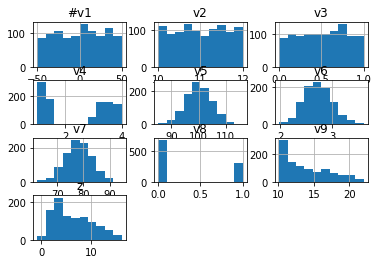

In [6]:
syntheticdf.hist()

In the whole data set there not looks like there are outliers. Some features are nearly equally distributed lke v1, v2 and v3. Some are not like v4, v8 and some are have distributeion of an gauß form like v7,v5,v6. To prepare the data for the training we can scale the features between 0 and 1.

In [7]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler_Standardization = StandardScaler()
scaler_Normalisation = MinMaxScaler()

normalized_data = scaler_Normalisation.fit_transform(syntheticdf)
standarized_data = scaler_Standardization.fit_transform(syntheticdf)


array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>,
        <Axes: title={'center': '2'}>],
       [<Axes: title={'center': '3'}>, <Axes: title={'center': '4'}>,
        <Axes: title={'center': '5'}>],
       [<Axes: title={'center': '6'}>, <Axes: title={'center': '7'}>,
        <Axes: title={'center': '8'}>],
       [<Axes: title={'center': '9'}>, <Axes: >, <Axes: >]], dtype=object)

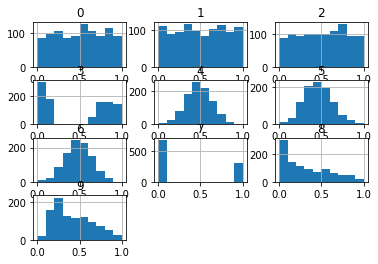

In [8]:
pd.DataFrame(normalized_data).hist()

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>,
        <Axes: title={'center': '2'}>],
       [<Axes: title={'center': '3'}>, <Axes: title={'center': '4'}>,
        <Axes: title={'center': '5'}>],
       [<Axes: title={'center': '6'}>, <Axes: title={'center': '7'}>,
        <Axes: title={'center': '8'}>],
       [<Axes: title={'center': '9'}>, <Axes: >, <Axes: >]], dtype=object)

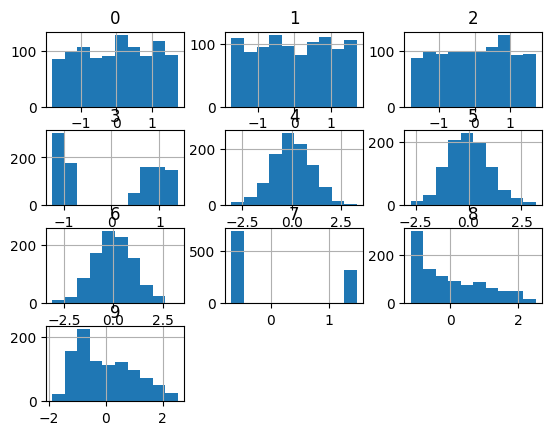

In [20]:
pd.DataFrame(standarized_data).hist()


In conclusion the standardisation could be preffered because we have some variables that are distributed like a gaußian distribution and standardisation considers the relationship data points. But we think this effect is here not to impactfull on the relation and therefore we would take the more simpler method the normalisation, also because there are no outliers.

In [9]:
df = pd.DataFrame(normalized_data, columns=['#v1','v2','v3','v4','v5','v6','v7','v8','v9','z'])
df.head()

,#v1,v2,v3,v4,v5,v6,v7,v8,v9,z
0,0.874335,0.271150,0.969445,0.856127,0.374743,0.894346,0.414925,0.0,0.829772,0.746620
1,0.541234,0.947532,0.467824,0.092297,0.482507,0.747468,0.434109,0.0,0.218086,0.350662
2,0.176390,0.484485,0.238439,0.136236,0.498353,0.688374,0.507217,1.0,0.052275,0.237661
3,0.043172,0.755097,0.925180,0.801257,0.669486,0.559499,0.640841,0.0,0.825091,0.814767
4,0.084136,0.058568,0.315165,0.005914,0.393162,0.517425,0.458254,0.0,0.084215,0.160640


In [11]:
# Scale the output to be between 0.1 and 0.9 for a better performance when we have the sigmoid activation
df["z"] = df["z"] * 0.8 + 0.1
df.describe()

,#v1,v2,v3,v4,v5,v6,v7,v8,v9,z
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.509967,0.502863,0.511535,0.472011,0.481202,0.462648,0.488116,0.313000,0.315763,0.439458
std,0.284657,0.292178,0.283411,0.382762,0.157389,0.169153,0.157022,0.463946,0.272606,0.182132
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000
25%,0.260483,0.255133,0.267556,0.085399,0.379107,0.347958,0.383749,0.000000,0.063845,0.285660
50%,0.528840,0.495642,0.515506,0.680507,0.475146,0.452818,0.486644,0.000000,0.250535,0.406141
75%,0.755635,0.759080,0.757586,0.832666,0.589703,0.570753,0.596294,1.000000,0.525065,0.576610
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.900000


In [12]:
df.to_csv("processed_datasets/synthetic.csv", index=False)